In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

from utils.conn_data import load_pickle
from portfolio_tools.Diagnostics import Diagnostics

plt.style.use('ggplot')

In [5]:
# parameters
train = True
strategy_name = "etfstsm"
ovrd = "0.95"
diag = Diagnostics()

strategy_name = f"training_{strategy_name}" if train else strategy_name

# paths
outputs_path = os.path.join(os.getcwd(), "data", "outputs")
dirs = os.listdir(os.path.join(outputs_path, strategy_name))

## Distribution of Utilities

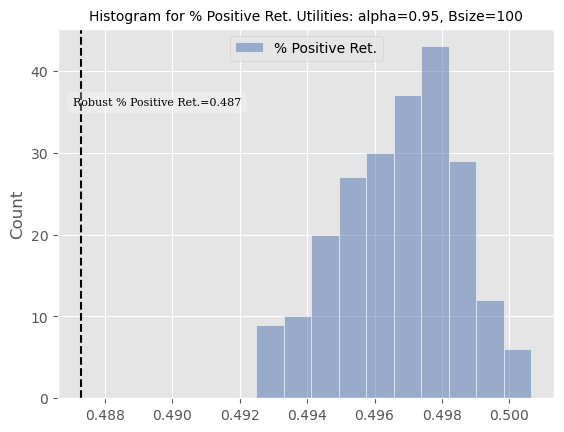

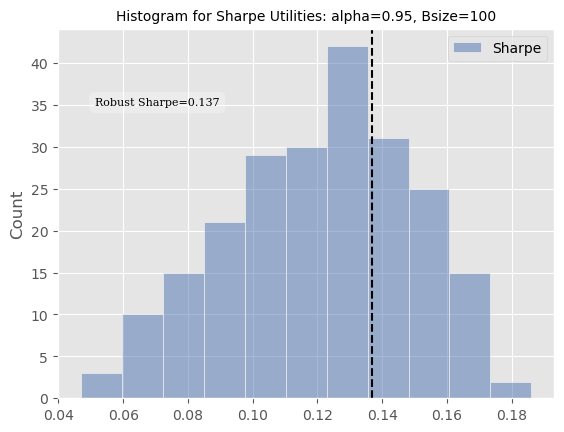

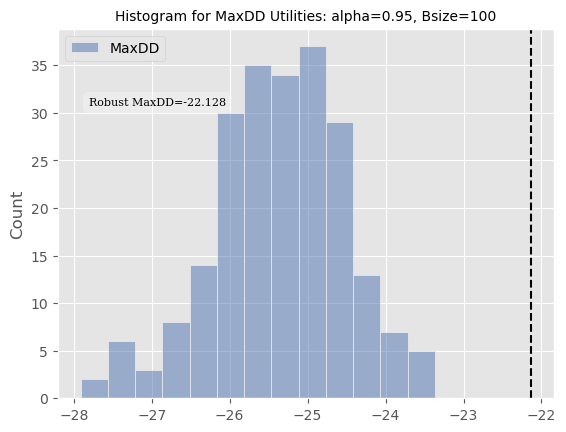

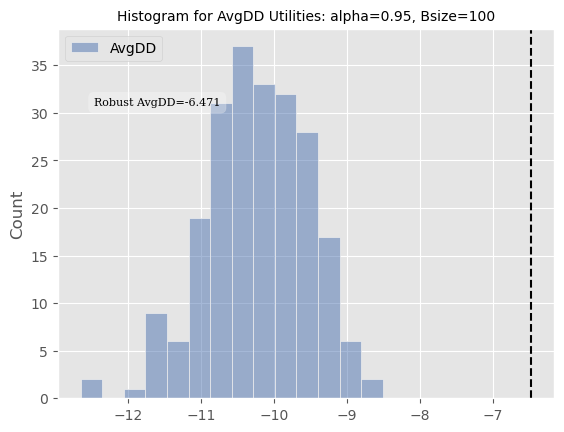

In [6]:
for dir in dirs:

    if ovrd not in dir:
        continue

    utility = dir.split("_")[0]
    functional = dir.split("_")[1]
    alpha = dir.split("_")[2]
    Bsize = dir.split("_")[3]

    args = load_pickle(os.path.join(outputs_path, strategy_name, dir, "args.pickle"))
    optmization = load_pickle(os.path.join(outputs_path, strategy_name, dir, "opt_results.pickle"))
    portfolio = load_pickle(os.path.join(outputs_path, strategy_name, dir, "portfolio_results.pickle"))

    utilities_val = []
    for i in range(len(optmization['utilities'])):

        if functional == "means":
            utility_val = torch.mean(optmization['utilities'][i]).item()
        else:
            raise Exception(f"functional not registered: {functional}")

        utilities_val.append(utility_val)

    robust_utility = diag.compute_metric(portoflio_returns=portfolio['agg_scaled_portfolio_returns'], metric_name=utility)
    average_utility = np.mean(utilities_val)
    utility_val_df = pd.DataFrame(utilities_val, columns=[utility])

    ax = sns.histplot(data=utility_val_df, palette="deep")

    ax.annotate(
        f"Robust {utility}={np.round(robust_utility, 3)}",
        xy=(0.2, 0.8),
        xycoords="axes fraction",
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.3),
        ha="center",
        va="center",
        family="serif",
        size="8"
    )

    plt.axvline(x=robust_utility, color='black', linestyle='--')
    plt.title(f"Histogram for {dir.split('_')[0]} Utilities: alpha={alpha}, Bsize={Bsize}", size=10)

    plt.show()

## Opitimal Strategy

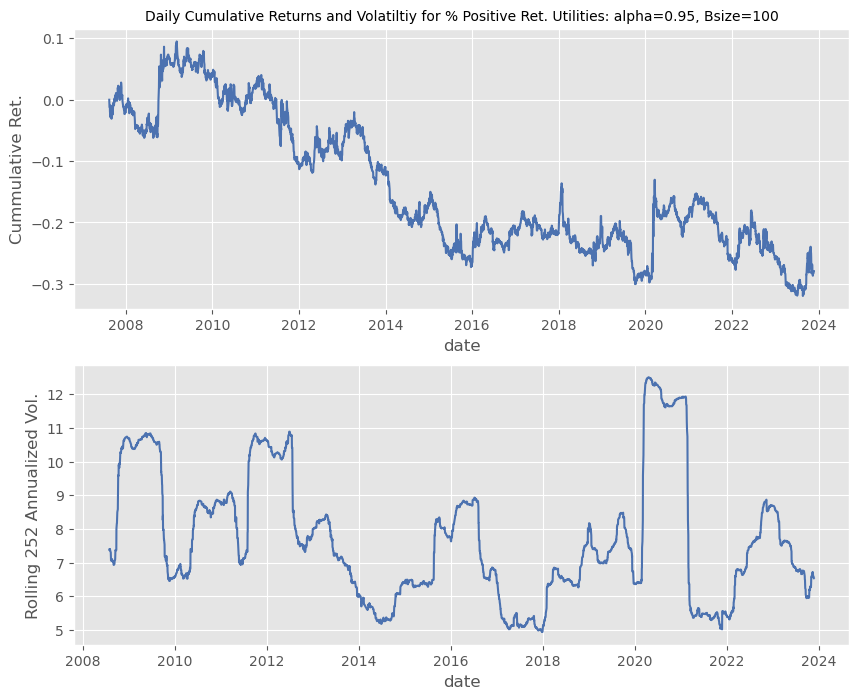

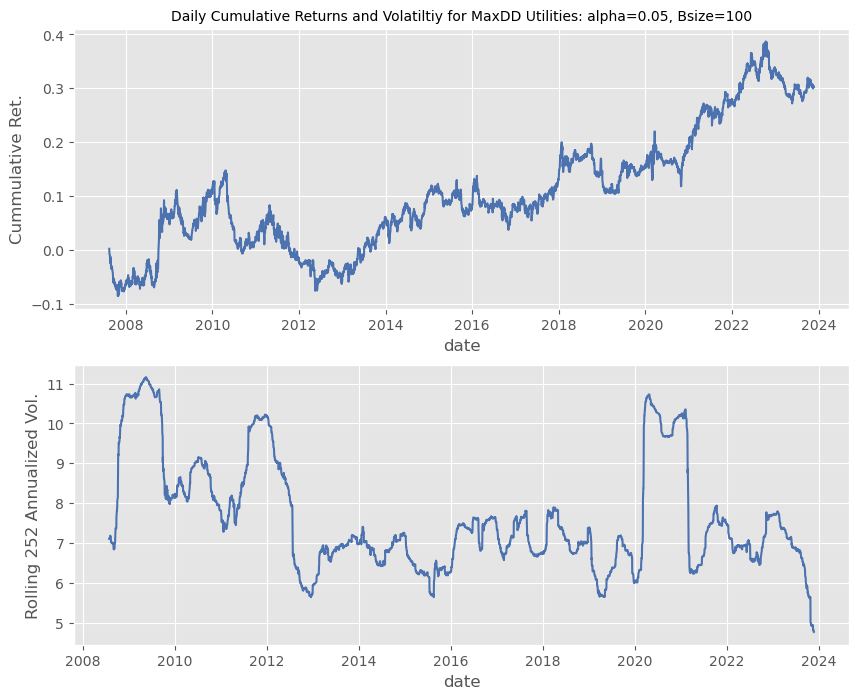

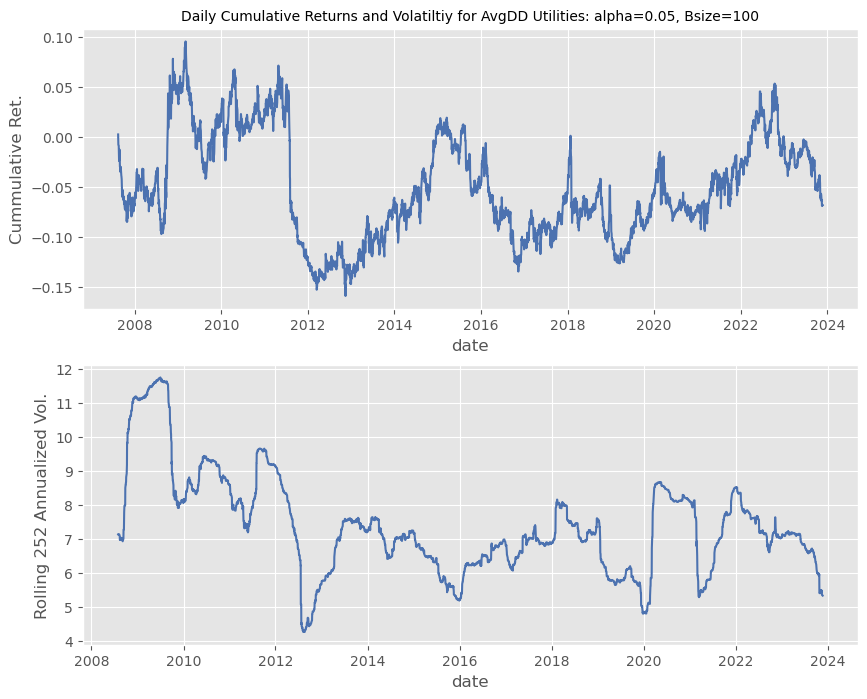

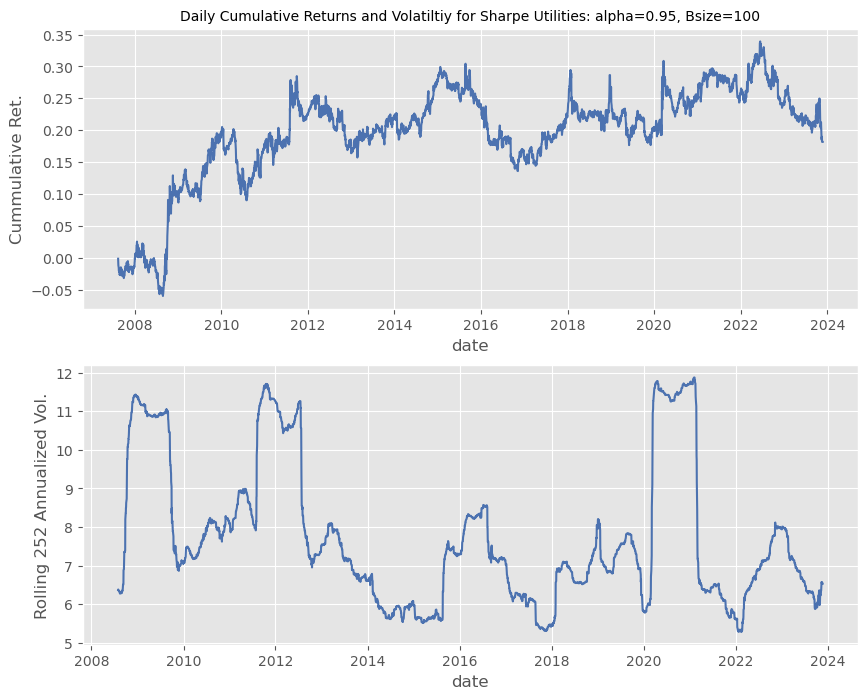

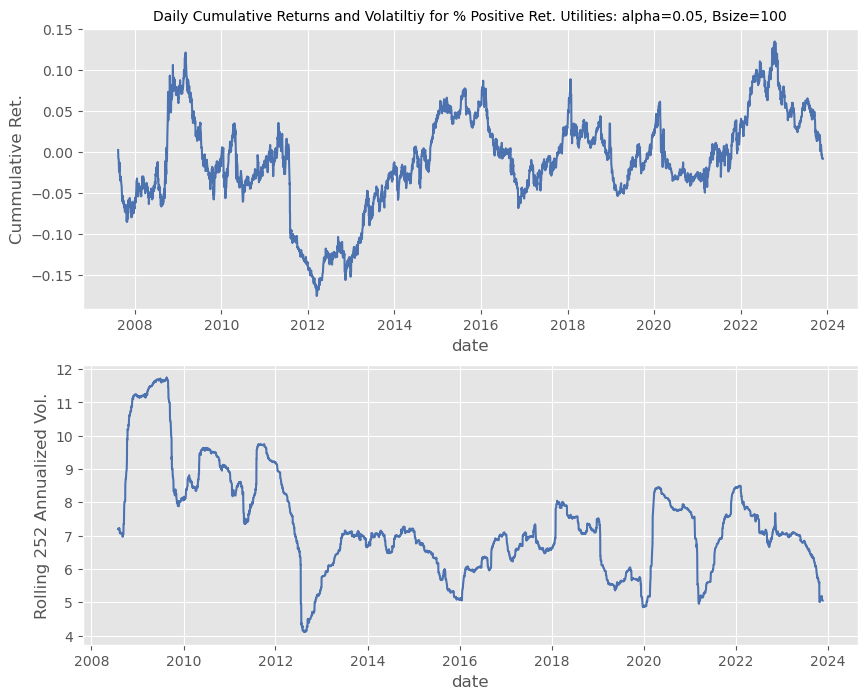

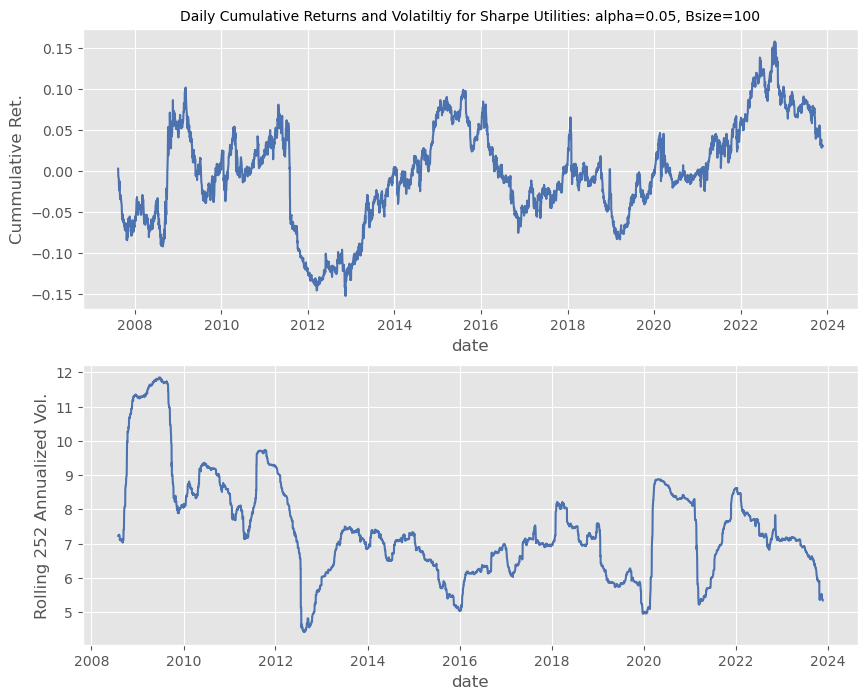

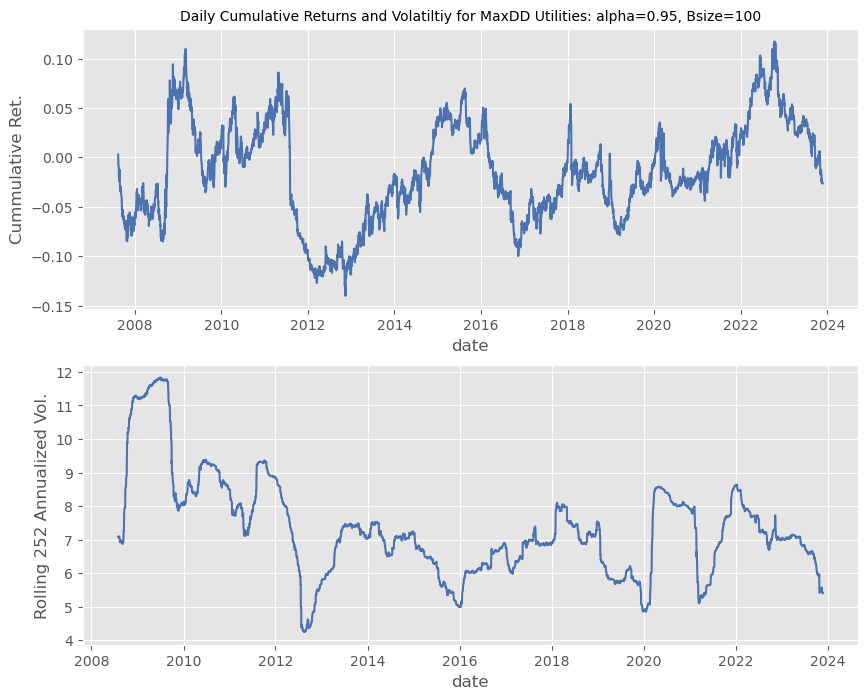

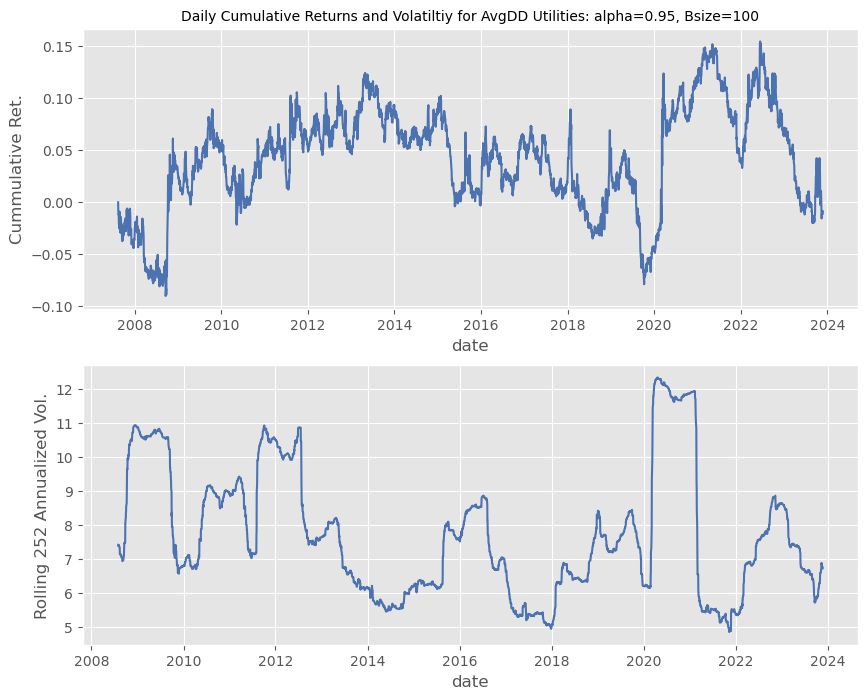

In [19]:
for dir in dirs:

    # if ovrd not in dir:
    #     continue

    utility = dir.split("_")[0]
    functional = dir.split("_")[1]
    alpha = dir.split("_")[2]
    Bsize = dir.split("_")[3]

    portfolio = load_pickle(os.path.join(outputs_path, strategy_name, dir, "portfolio_results.pickle"))

    daily_rets = portfolio['agg_scaled_portfolio_returns']
    rolling_vol = daily_rets.rolling(window=252).std() * np.sqrt(252) * 100
    daily_cumm_rets = daily_rets.cumsum()       

    # Create a figure with two subplots (axes), one on top of the other
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # Adjust figsize as needed

    # First subplot
    ax1.set_title(f"Daily Cumulative Returns and Volatiltiy for {dir.split('_')[0]} Utilities: alpha={alpha}, Bsize={Bsize}", size=10)
    sns.lineplot(data=daily_cumm_rets, linewidth=1.5, palette="deep", ax=ax1)
    ax1.set_ylabel("Cummulative Ret.")
    ax1.get_legend().remove()

    # First subplot
    sns.lineplot(data=rolling_vol, linewidth=1.5, palette="deep", ax=ax2)
    ax2.set_ylabel("Rolling 252 Annualized Vol.")
    ax2.get_legend().remove()

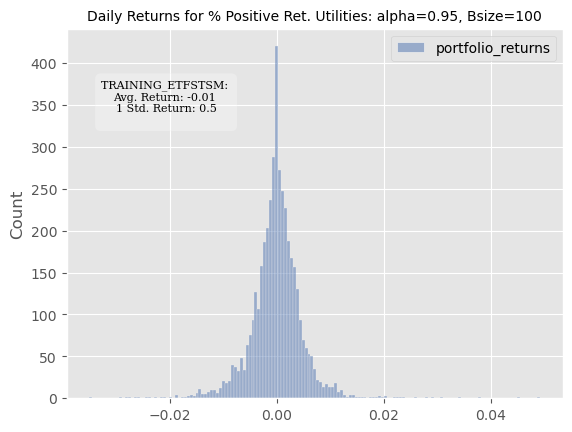

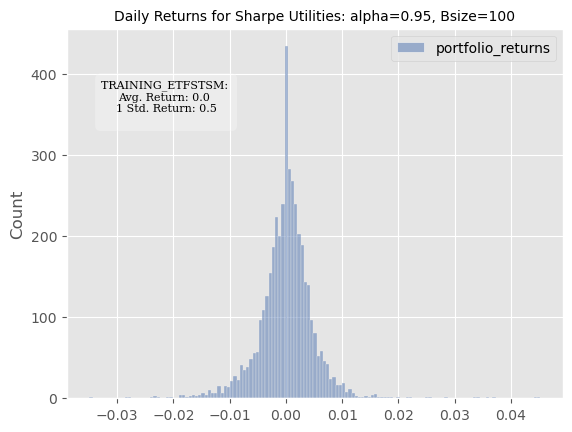

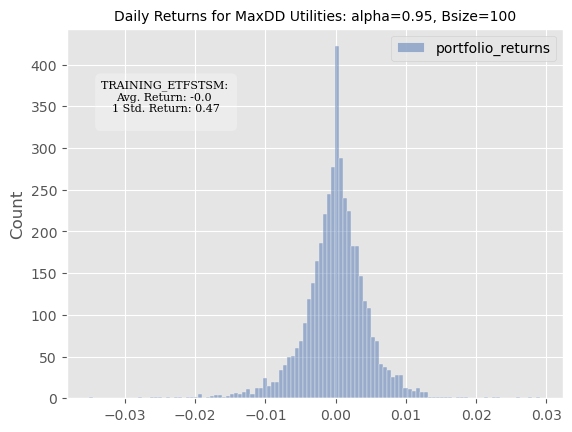

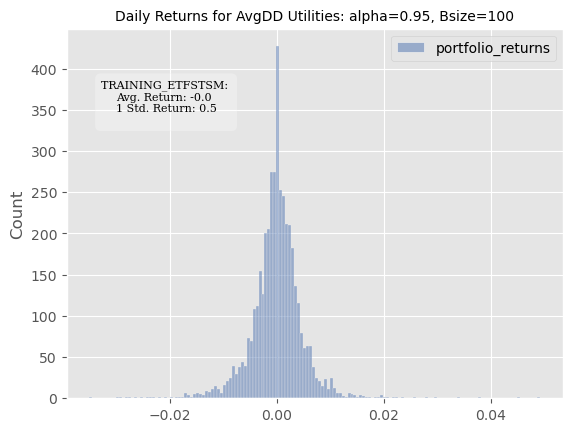

In [20]:
for dir in dirs:

    if ovrd not in dir:
        continue

    utility = dir.split("_")[0]
    functional = dir.split("_")[1]
    alpha = dir.split("_")[2]
    Bsize = dir.split("_")[3]

    portfolio = load_pickle(os.path.join(outputs_path, strategy_name, dir, "portfolio_results.pickle"))

    daily_rets = portfolio['agg_scaled_portfolio_returns']
    rolling_vol = daily_rets.rolling(window=252).std() * np.sqrt(252) * 100
    daily_cumm_rets = daily_rets.cumsum()       

    ax = sns.histplot(data=daily_rets, palette="deep")
    ax.annotate(
        "{}: \nAvg. Return: {} \n1 Std. Return: {}\n".format(
            strategy_name.upper(), (daily_rets.mean().iloc[0] * 100).round(2), (daily_rets.std().iloc[0] * 100).round(2)
        ),
        xy=(0.2, 0.8),
        xycoords="axes fraction",
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.3),
        ha="center",
        va="center",
        family="serif",
        size="8"
    )
    plt.title(f"Daily Returns for {dir.split('_')[0]} Utilities: alpha={alpha}, Bsize={Bsize}", size=10)
    plt.show()